In [375]:
import pandas as pd
import numpy as np

from settings import *

df = pd.read_json(
    PATH_RECIPES_JSON,
    orient="records",
)
assert isinstance(df, pd.DataFrame)


In [376]:
df.shape


(152, 19)

In [377]:
list(df)


['simulation',
 'dynamic range',
 'highlight',
 'shadow',
 'noise reduction',
 'sharpening',
 'grain effect',
 'color chrome effect',
 'white balance',
 'iso',
 'p_html',
 'p_strings',
 'name',
 'date',
 'link',
 'exposure compensation',
 'sharpness',
 'clarity',
 'color chrome effect blue']

In [378]:
df.dtypes


simulation                          object
dynamic range                       object
highlight                          float64
shadow                             float64
noise reduction                    float64
sharpening                         float64
grain effect                        object
color chrome effect                 object
white balance                       object
iso                                 object
p_html                              object
p_strings                           object
name                                object
date                        datetime64[ns]
link                                object
exposure compensation               object
sharpness                          float64
clarity                            float64
color chrome effect blue            object
dtype: object

In [379]:
df.describe()


,highlight,shadow,noise reduction,sharpening,sharpness,clarity
count,148.000000,148.000000,151.000000,103.000000,48.000000,99.000000
mean,0.635135,1.118243,-3.947020,-0.669903,-1.229167,-1.515152
std,1.909157,1.986657,0.513655,1.859730,1.308557,2.826130
min,-2.000000,-2.000000,-4.000000,-4.000000,-4.000000,-5.000000
25%,-1.000000,-0.500000,-4.000000,-2.000000,-2.000000,-3.500000
50%,0.000000,1.000000,-4.000000,-1.000000,-1.000000,-2.000000
75%,2.000000,3.000000,-4.000000,1.000000,0.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,1.000000,5.000000


# simulation

['eterna' 'acros' 'velvia' 'pro neg. std' 'classic chrome' 'astia'
 'pro neg. hi' 'provia' 'monochrome' 'acros+r' 'classic negative' nan
 'acros+g' 'monochrome+g' 'eterna bleach bypass' 'acros+y']

missing simulation
45    Sepia
Name: name, dtype: object


<AxesSubplot: >

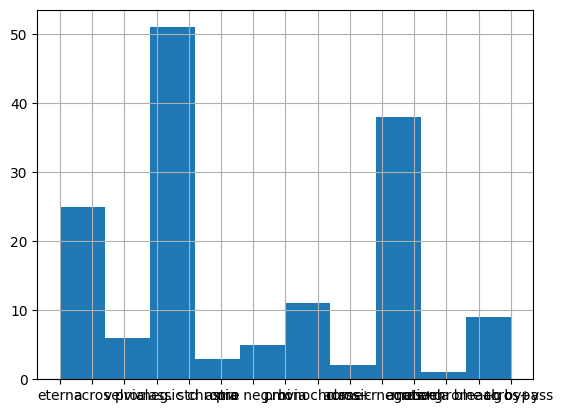

In [380]:
# print unique values
print(df.simulation.unique())

print()
print("missing simulation")
print(df[df.simulation.isna()]["name"])

df.simulation.hist()


# sharpness

[-4, -3, -2, -1, 0, 1, 2, 3, 4]


<AxesSubplot: >

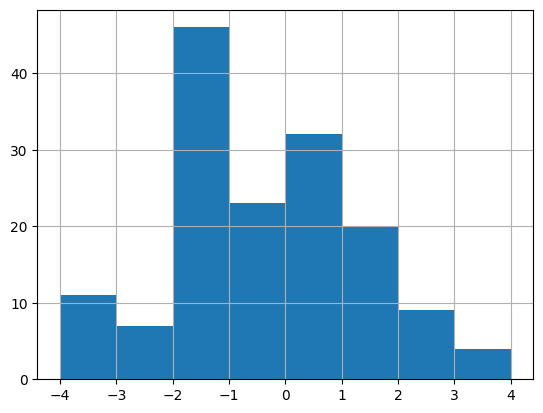

In [381]:
# fillna with sharpening values
df.sharpness.fillna(value=df.sharpening, inplace=True)

# fill na with 0
df.sharpness.fillna(value=0, inplace=True)

# drop sharpening
df.drop(columns=["sharpening"], inplace=True)

# convert to int
df.sharpness = df.sharpness.astype("int")

# print unique values
print(sorted(df.sharpness.unique()))

df.sharpness.hist(bins=np.arange(-4, 5))

# clarity

[-5, -4, -3, -2, 0, 1, 2, 3, 4, 5]


<AxesSubplot: >

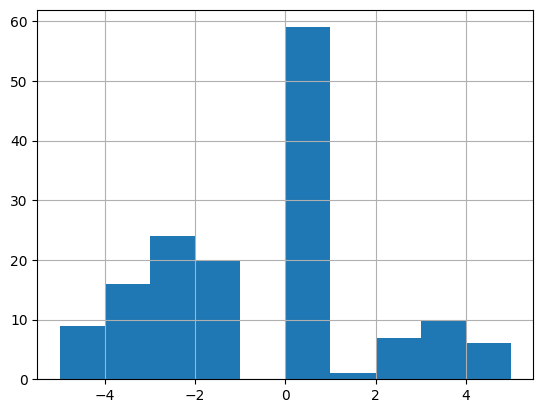

In [382]:
# fill na with 0
df.clarity.fillna(value=0, inplace=True)

# convert to int
df.clarity = df.clarity.astype("int")

# print unique values
print(sorted(df.clarity.unique()))

df.clarity.hist(bins=np.arange(-5, 6))


# noise reduction

[-4, -2, 0, 2]


<AxesSubplot: >

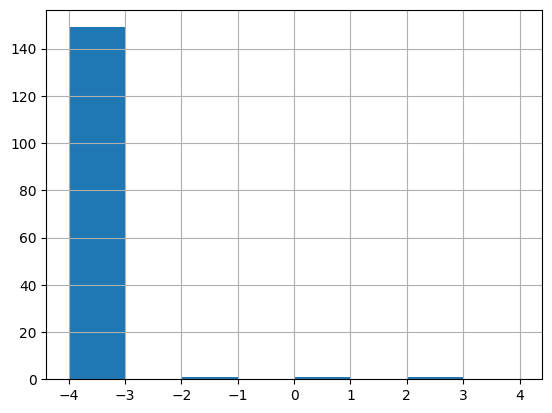

In [383]:
# fill na with 0
df["noise reduction"].fillna(value=0, inplace=True)

# convert to int
df["noise reduction"] = df["noise reduction"].astype("int")

# print unique values
print(sorted(df["noise reduction"].unique()))

df["noise reduction"].hist(bins=np.arange(-4, 5))


# shadow

[ 4.   1.   2.  -1.   3.   0.  -2.   nan  1.5  2.5 -0.5 -1.5]
                        name  shadow
45                     Sepia     NaN
96           Scanned Superia     NaN
97              Portra-Style     NaN
98  Pulled Fujicolor Superia     NaN


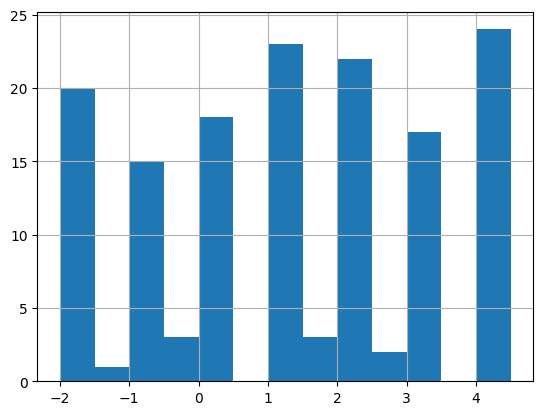

In [384]:
# print unique values
print(df.shadow.unique())

df[df.shadow.notna()]["shadow"].hist(bins=np.arange(-2, 5, 0.5))

no_shadow = df[df.shadow.isna()][["name", "shadow"]]
print(no_shadow)

# fill nan with n/a
df.loc[df.shadow.isna(), ["shadow"]] = "n/a"

# highlight

[ 4.  -2.   0.   3.   1.  -1.   2.   nan  0.5 -0.5  3.5 -1.5]
                        name  highlight
45                     Sepia        NaN
96           Scanned Superia        NaN
97              Portra-Style        NaN
98  Pulled Fujicolor Superia        NaN


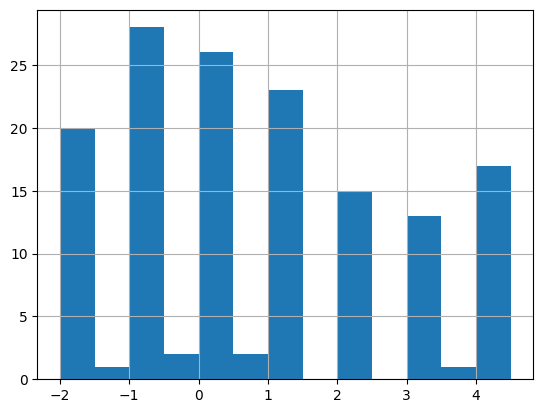

In [392]:
# print unique values
print(df.highlight.unique())

df[df.highlight.notna()]["highlight"].hist(bins=np.arange(-2, 5, 0.5))

no_highlight = df[df.highlight.isna()][["name", "highlight"]]
print(no_highlight)

# fill nan with n/a
df.loc[df.highlight.isna(), ["highlight"]] = "n/a"

# 

# color chrome effect blue

['off', 'strong', 'weak']


<AxesSubplot: >

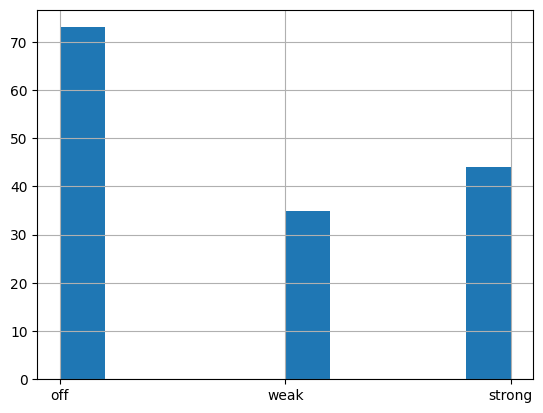

In [386]:
# fill nan with off
df["color chrome effect blue"].fillna("off", inplace=True)

# print unique values
print(sorted(df["color chrome effect blue"].unique()))

df["color chrome effect blue"].hist()


# color chrome effect

<AxesSubplot: >

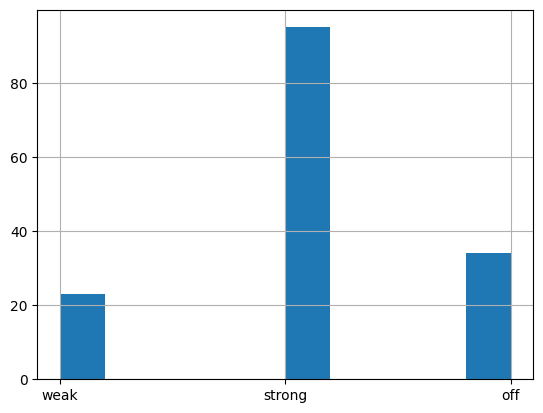

In [387]:
# off for not weak and not strong
cce_off = (df["color chrome effect"] != "weak") & (
    df["color chrome effect"] != "strong"
)
df.loc[cce_off, ["color chrome effect"]] = "off"

df["color chrome effect"].hist()


# grain effect

In [388]:
# fillna with off
df["grain effect"].fillna("off",inplace=True)

# print unique values
print(sorted(df["grain effect"].unique()))

['off', 'strong', 'strong, large', 'strong, small', 'weak', 'weak, large', 'weak, small']


<AxesSubplot: >

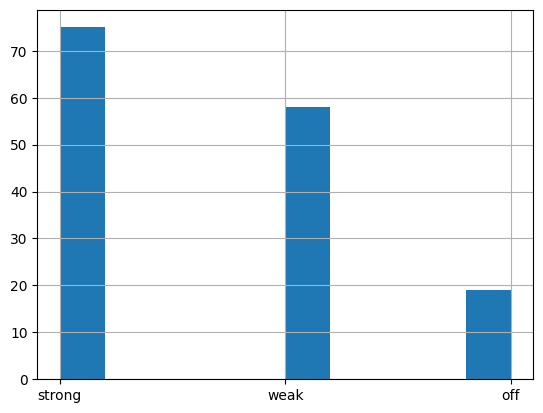

In [389]:
# build grain strength
df["grain strength"] = "off"

grain_strong = (df["grain effect"] == "strong") | (df["grain effect"] == "strong, small") | (df["grain effect"] == "strong, large") 
df.loc[grain_strong, ["grain strength"]] = "strong"

grain_weak = (df["grain effect"] == "weak") | (df["grain effect"] == "weak, small") | (df["grain effect"] == "weak, large") 
df.loc[grain_weak, ["grain strength"]] = "weak"

df["grain strength"].hist()

<AxesSubplot: >

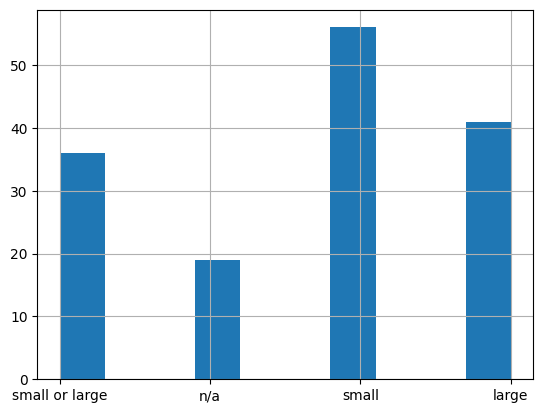

In [390]:
# build grain size
df["grain size"] = "n/a"

grain_small = (df["grain effect"] == "weak, small") | (df["grain effect"] == "strong, small")
df.loc[grain_small, ["grain size"]] = "small"

grain_large = (df["grain effect"] == "weak, large") | (df["grain effect"] == "strong, large")
df.loc[grain_large, ["grain size"]] = "large"

grain_either = (df["grain effect"] == "weak") | (df["grain effect"] == "strong")
df.loc[grain_either, ["grain size"]] = "small or large"

df["grain size"].hist()

# exposure compensation

In [394]:
# fill nan with 0
df["exposure compensation"].fillna("0",inplace=True)

# fill blank with 0
df.loc[df["exposure compensation"] == "", ["exposure compensation"]] = "0"

# remove ` (typically)`
df["exposure compensation"] = df["exposure compensation"].str.replace(" (typically)","",regex=False)

# print unique values
# print(*sorted(df["exposure compensation"].unique()),sep="\n")

+1 2/3 to +2 1/3
+1 to +1 2/3
+1 to +1 2/3, but try between +1/3 to +2 2/3
+1 to +2
+1/3
+1/3 to +1
+1/3 to +1 (main exposure), 0 to -2 (second exposure)
+1/3 to +2/3
+2/3 to + 1-1/3
+2/3 to +1
+2/3 to +1 1/3
+2/3 to +1 1/3 for the 1st exposure, 0 to +1/3 for the 2nd exposure
+2/3 to +1-1/3
-1 to 0
-1/3 to +1/3
-1/3 to +2/3
-1/3 to -1
-1/3 to -2/3
-2/3 to +1
-2/3 to +2/3
-2/3 to -1 1/3
0
0 to +1
0 to +1/3
0 to +2/3
0 to -1
0 to -2/3


# dynamic range

dr100
dr400
dr-auto
dr200
d-range priority auto
d-range priority strong


<AxesSubplot: >

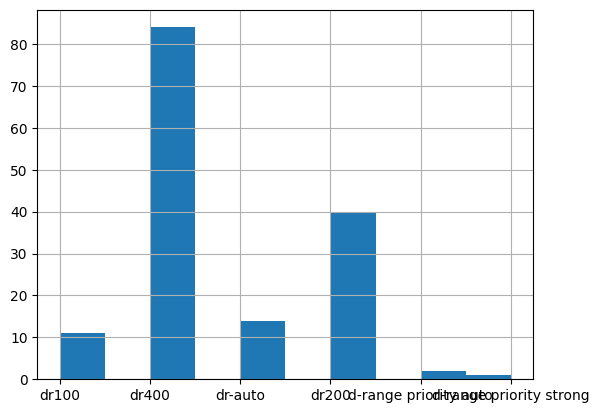

In [399]:
# fill n/a with dr-auto
df.loc[df["dynamic range"] == "n/a", ["dynamic range"]] = "dr-auto"

# replace blank with dr-auto
df.loc[df["dynamic range"] == "", ["dynamic range"]] = "dr-auto"

# fill nan with dr-auto
df["dynamic range"].fillna("dr-auto", inplace=True)

# remove verbose setting
df["dynamic range"] = df["dynamic range"].str.replace("dr400 (dr200 in low contrast situations)", "dr400", regex=False)

# print unique values
print(*df["dynamic range"].unique(),sep="\n")

df["dynamic range"].hist()